# 5. Support Vector Machines

Support vector machines can be used for linear and nonlinear classification, regression and outlier detection.

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (5,5)
plt.style.use('ggplot')

## 5.1 Linear SVM Classification

SVMs are sensitive to feature scaling, so demarcation margin can drastically change with feature transformation. In terms of margins, there are two types of classification:
- **Hard margin**, only possible if data linearly seperabale and sensitive to outliers.
- **Soft margin**, more flexible but some constraints violated.

One hyperparameter for SVMs is `C` and can be interpreted as stricness. Higher the `C` the more strict the model in terms of margin violations.



In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(int)

svm_clf = Pipeline([
    ("scalar", StandardScaler()),
    ("linear_svc", SVC(kernel="linear", C=1))
])

svm_clf.fit(X,y)
svm_clf.predict([[5.5,1.7]])

array([1])

For huge dataset, it is advisable to use `SGDClassifier(loss="hinge", alpha=1/(m*C))` instead since it's possible to handle out of core training. Also, setting `dual=False` is more effective in `LinearSVC` unless number of features is higher than sample size.

## 5.2 Nonlinear SVM Classification

Unfortunately most datasets are not linearly separable. In this case, we can transform features just like we  did in previous chapter using polynomial features.

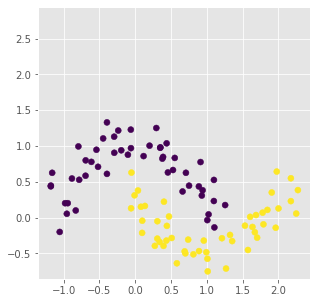

Accuracy 0.98


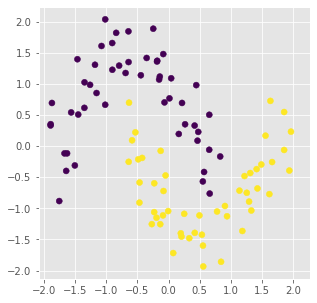

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15)
plt.scatter(X[:,0], X[:,1], c=y)
plt.axis('square')
plt.show()

polynomial_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss="hinge"))
])

polynomial_pipeline.fit(X,y)
preds = polynomial_pipeline.predict(X)
print(f"Accuracy { 1 - (sum(y ^ preds) / len(y))}")

X_scaled = StandardScaler().fit_transform(X)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y)
plt.axis('square')
plt.show()


Instead of generating many features with using polynoms, we can use kernel trick to establish the same results.

In [6]:
from sklearn.svm import SVC

poly_kernel_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svc.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

## 5.3 SVM Regression 

## 5.4 Under the Hood